In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Optional: nicer style
sns.set(style="whitegrid")


In [ ]:
# Step 2: Load Dataset
df = pd.read_csv('/content/New Year Sales Data.csv', encoding='latin1')  # use your exact file name

In [ ]:
# See first 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
# Shape of data
df.shape

(11251, 15)

In [ ]:
# Column names
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [ ]:
# Info about data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
# Summary statistics for numeric columns
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [ ]:
# Total null values per column
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
important_cols = ['Amount', 'Gender', 'Age Group', 'State',
                  'Marital_Status', 'Occupation', 'Product_Category']  # adjust to your file

df = df.dropna(subset=important_cols)
df.isnull().sum()  # recheck


,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [ ]:
df['Amount'] = df['Amount'].astype(int)
df['Amount'].dtype



dtype('int64')

In [ ]:
# Summary statistics again after cleaning
df.describe()

# Unique values in key columns
for col in ['Gender', 'Age Group', 'State', 'Marital_Status', 'Occupation', 'Product_Category']:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].unique())



Unique values in Gender:
['F' 'M']

Unique values in Age Group:
['26-35' '0-17' '18-25' '51-55' '46-50' '55+' '36-45']

Unique values in State:
['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Jharkhand' 'Kerala' 'Haryana'
 'Madhya Pradesh' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']

Unique values in Marital_Status:
[0 1]

Unique values in Occupation:
['Healthcare' 'Govt' 'Automobile' 'Construction' 'Food Processing'
 'Lawyer' 'Media' 'Banking' 'Retail' 'IT Sector' 'Aviation' 'Hospitality'
 'Agriculture' 'Textile' 'Chemical']

Unique values in Product_Category:
['Auto' 'Hand & Power Tools' 'Stationery' 'Tupperware' 'Footwear & Shoes'
 'Furniture' 'Food' 'Games & Toys' 'Sports Products' 'Books'
 'Electronics & Gadgets' 'Decor' 'Clothing & Apparel' 'Beauty'
 'Household items' 'Pet Care' 'Veterinary' 'Office']


In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)


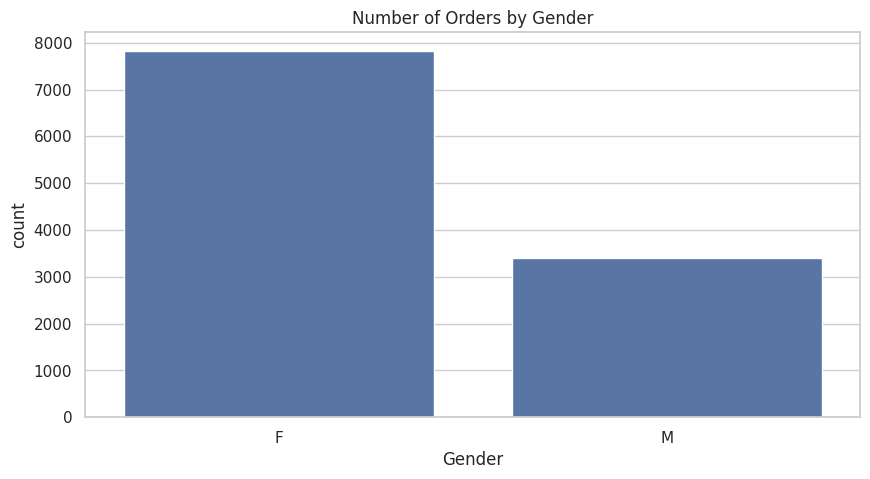

In [ ]:
sns.countplot(data=df, x='Gender')
plt.title("Number of Orders by Gender")
plt.show()


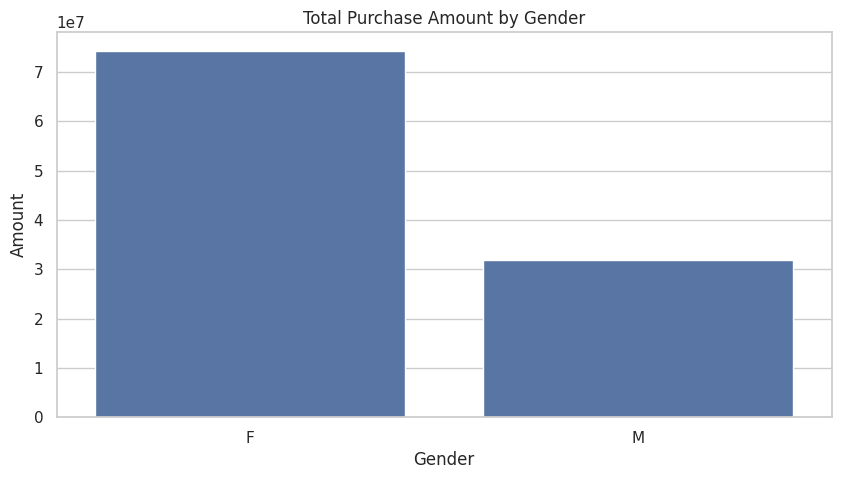

,Gender,Amount
0,F,74335853
1,M,31913276


In [ ]:
gender_amount = df.groupby('Gender')['Amount'].sum().reset_index()

sns.barplot(data=gender_amount, x='Gender', y='Amount')
plt.title("Total Purchase Amount by Gender")
plt.show()

gender_amount


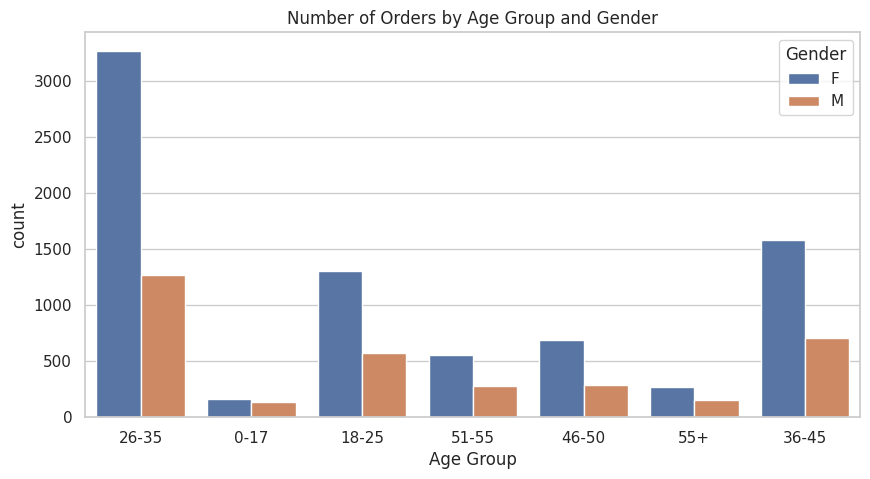

In [ ]:
sns.countplot(data=df, x='Age Group', hue='Gender')
plt.title("Number of Orders by Age Group and Gender")
plt.show()


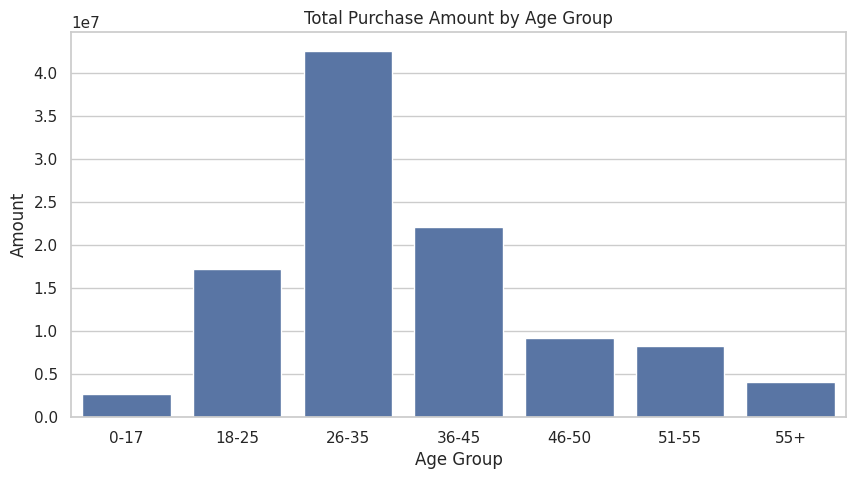

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


In [ ]:
age_amount = df.groupby('Age Group')['Amount'].sum().reset_index()

sns.barplot(data=age_amount, x='Age Group', y='Amount')
plt.title("Total Purchase Amount by Age Group")
plt.show()

age_amount


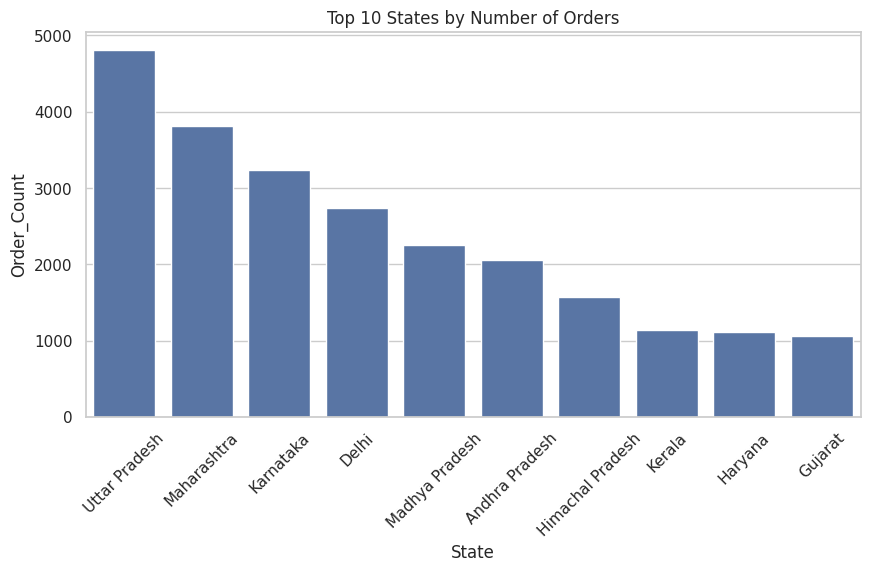

,State,Order_Count
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


In [ ]:
orders_by_state = df.groupby('State')['Orders'].sum().reset_index()
orders_by_state = orders_by_state.rename(columns={'Orders': 'Order_Count'})

orders_by_state = orders_by_state.sort_values(by='Order_Count', ascending=False).head(10)

sns.barplot(data=orders_by_state, x='State', y='Order_Count')
plt.xticks(rotation=45)
plt.title("Top 10 States by Number of Orders")
plt.show()

orders_by_state

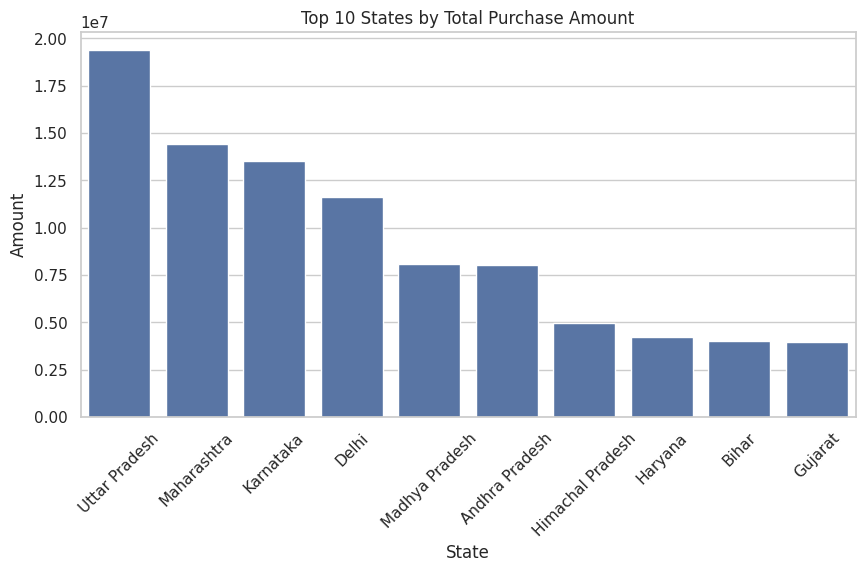

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


In [ ]:
amount_by_state = df.groupby('State')['Amount'].sum().reset_index()
amount_by_state = amount_by_state.sort_values(by='Amount', ascending=False).head(10)

sns.barplot(data=amount_by_state, x='State', y='Amount')
plt.xticks(rotation=45)
plt.title("Top 10 States by Total Purchase Amount")
plt.show()

amount_by_state


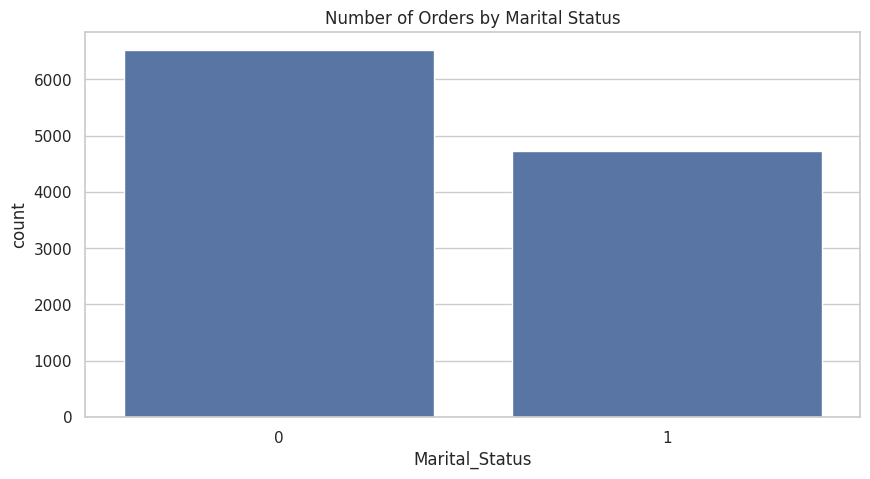

In [ ]:
sns.countplot(data=df, x='Marital_Status')
plt.title("Number of Orders by Marital Status")
plt.show()


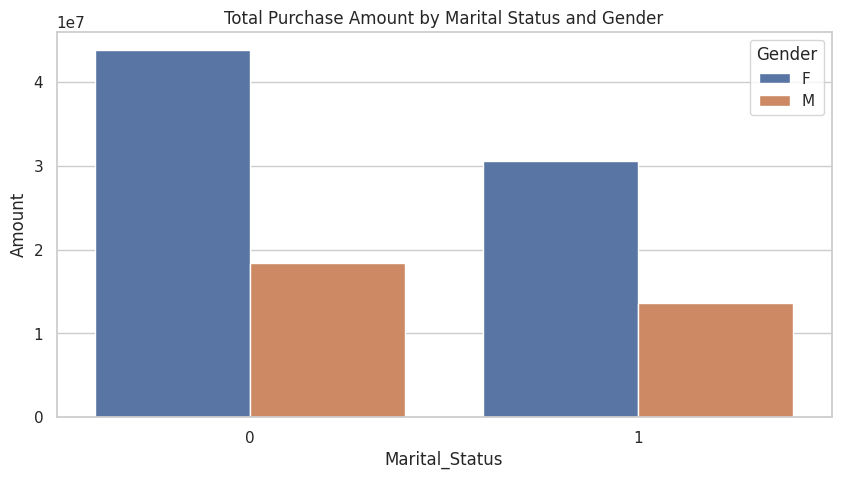

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


In [ ]:
marital_amount = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()

sns.barplot(data=marital_amount, x='Marital_Status', y='Amount', hue='Gender')
plt.title("Total Purchase Amount by Marital Status and Gender")
plt.show()

marital_amount


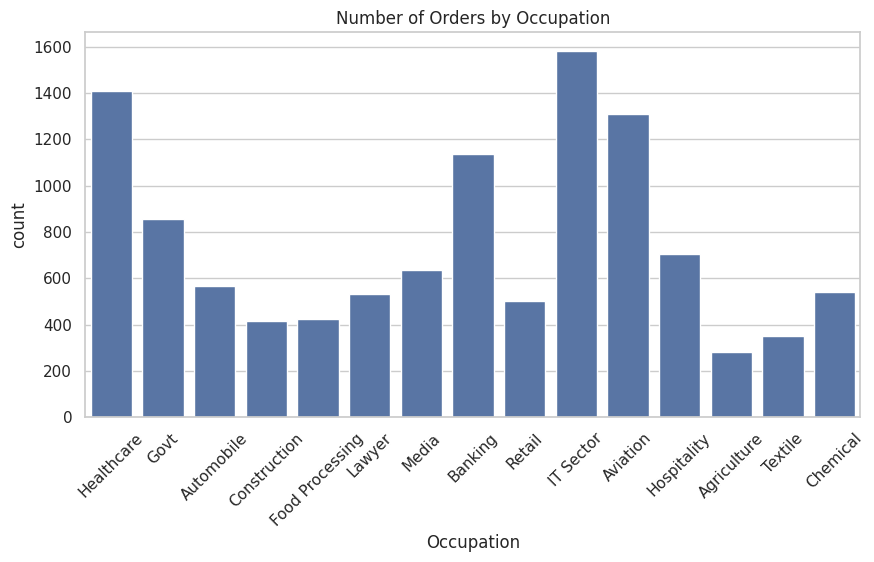

In [ ]:
sns.countplot(data=df, x='Occupation')
plt.xticks(rotation=45)
plt.title("Number of Orders by Occupation")
plt.show()


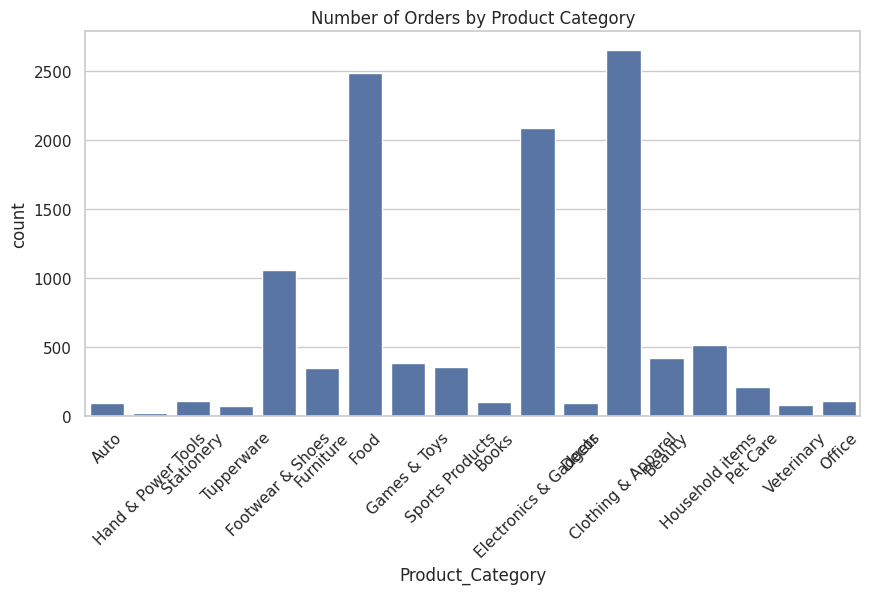

In [ ]:
sns.countplot(data=df, x='Product_Category')
plt.xticks(rotation=45)
plt.title("Number of Orders by Product Category")
plt.show()


Q1. Which age group contributes the most to each product category, and does this vary by gender?

In [ ]:
age_cat_amount = df.groupby(['Product_Category', 'Age Group', 'Gender'])['Amount'].sum().reset_index()
age_cat_amount.head()


,Product_Category,Age Group,Gender,Amount
0,Auto,0-17,F,9732
1,Auto,0-17,M,47151
2,Auto,18-25,F,288925
3,Auto,18-25,M,61369
4,Auto,26-35,F,541529


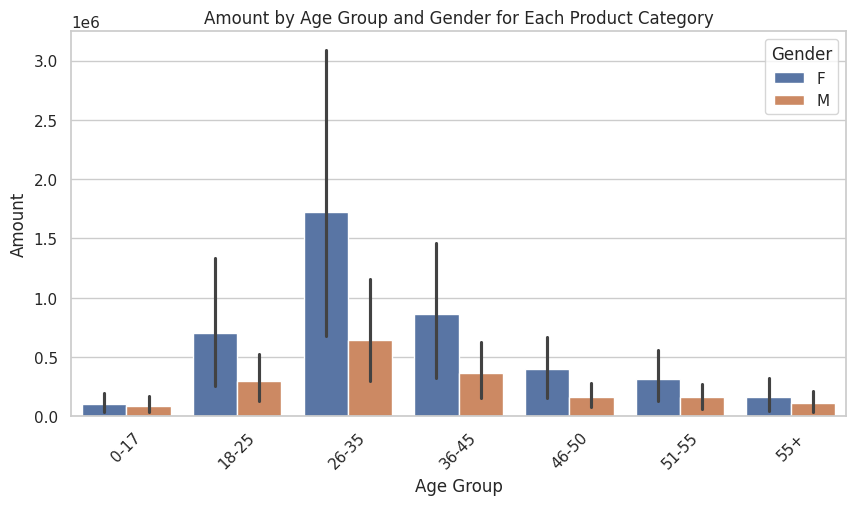

In [ ]:
sns.barplot(data=age_cat_amount, x='Age Group', y='Amount', hue='Gender')
plt.title("Amount by Age Group and Gender for Each Product Category")
plt.xticks(rotation=45)
plt.show()


Q2. How does the amount spent vary by marital status across different age groups?

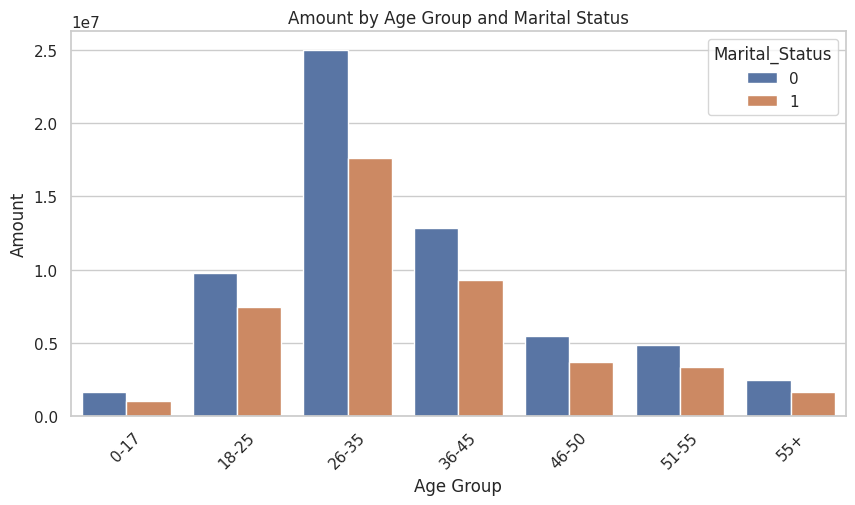

,Marital_Status,Age Group,Amount
0,0,0-17,1655299
1,0,18-25,9781617
2,0,26-35,25008749
3,0,36-45,12870401
4,0,46-50,5472555
5,0,51-55,4884765
6,0,55+,2451998
7,1,0-17,1044354
8,1,18-25,7459115
9,1,26-35,17604693


In [ ]:
marital_age_amount = df.groupby(['Marital_Status', 'Age Group'])['Amount'].sum().reset_index()

sns.barplot(data=marital_age_amount, x='Age Group', y='Amount', hue='Marital_Status')
plt.title("Amount by Age Group and Marital Status")
plt.xticks(rotation=45)
plt.show()

marital_age_amount


Q3. Which states show the highest growth in orders and revenue, and are there seasonal spikes in sales?

In [ ]:
# Create a synthetic 'Order_Date' column
# This assumes orders are spread daily over a period starting from '2023-01-01'
df['Order_Date'] = pd.to_datetime(pd.date_range(start='2023-01-01', periods=len(df), freq='D').to_series().reset_index(drop=True))

# Create Month-Year column
df['Month_Year'] = df['Order_Date'].dt.to_period('M').astype(str)

# Group by State and Month_Year to get orders and revenue
state_month = df.groupby(['State', 'Month_Year']).agg(
    Orders=('Orders', 'sum'),
    Revenue=('Amount', 'sum')
).reset_index()

state_month.head()

,State,Month_Year,Orders,Revenue
0,Andhra Pradesh,2023-01,37,330381
1,Andhra Pradesh,2023-02,35,301569
2,Andhra Pradesh,2023-03,2,21178
3,Andhra Pradesh,2023-04,2,20930
4,Andhra Pradesh,2023-08,4,20515


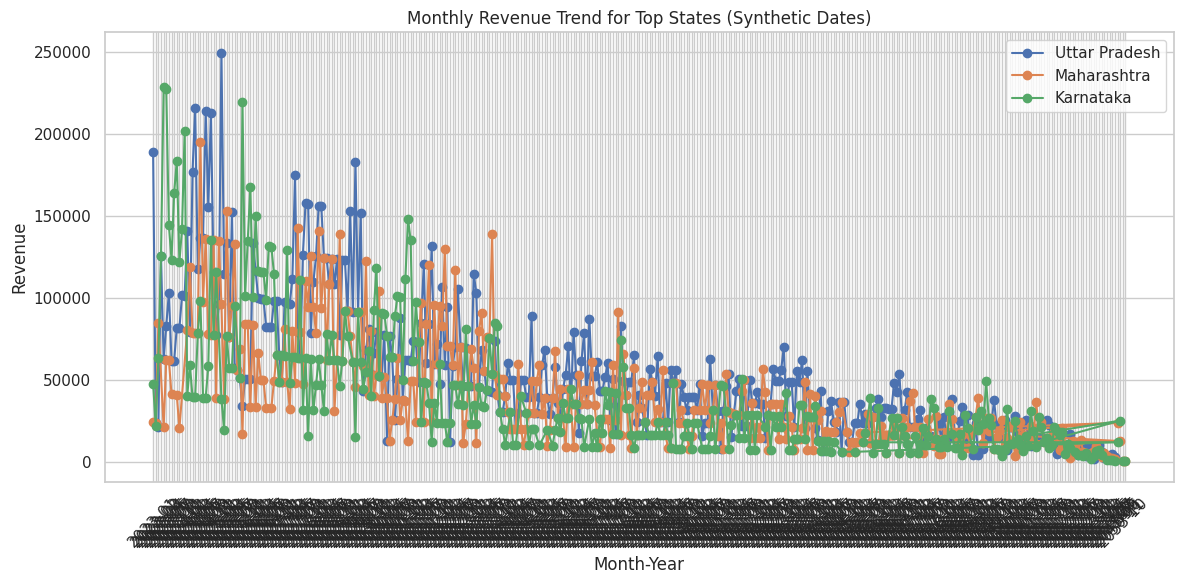

In [ ]:
top_states = amount_by_state['State'].head(3).tolist()  # from earlier

plt.figure(figsize=(12, 6))
for st in top_states:
    temp = state_month[state_month['State'] == st]
    # Ensure Month_Year is sorted for correct plotting
    temp = temp.sort_values(by='Month_Year')
    plt.plot(temp['Month_Year'], temp['Revenue'], marker='o', label=st)

plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend for Top States (Synthetic Dates)")
plt.xlabel("Month-Year")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q4. Are there specific occupations that prefer particular product categories more than others?

In [ ]:
occ_cat = df.groupby(['Occupation', 'Product_Category'])['Amount'].sum().reset_index()

# Pivot to see clearly
pivot_occ_cat = occ_cat.pivot(index='Occupation', columns='Product_Category', values='Amount').fillna(0)
pivot_occ_cat


Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Occupation,,,,,,,,,,,,,,,,,,
Agriculture,18609.0,43951.0,28650.0,437296.0,14057.0,352614.0,930908.0,336636.0,80594.0,59005.0,23160.0,44079.0,4175.0,14926.0,91762.0,64976.0,42085.0,5604.0
Automobile,165586.0,94231.0,10364.0,870150.0,27818.0,1006127.0,1446125.0,717888.0,339543.0,149516.0,0.0,72656.0,931.0,26798.0,192694.0,73226.0,162058.0,12885.0
Aviation,244129.0,184171.0,222422.0,1716254.0,59625.0,1774366.0,4306343.0,1972899.0,618951.0,429440.0,19324.0,226272.0,7537.0,61840.0,360274.0,221390.0,166601.0,10460.0
Banking,253553.0,153034.0,109905.0,1738400.0,128764.0,1919127.0,2894943.0,1611992.0,605507.0,536829.0,123721.0,125833.0,6415.0,34061.0,307393.0,170462.0,37405.0,13266.0
Chemical,0.0,53654.0,73531.0,727491.0,29494.0,775674.0,1821161.0,864974.0,400051.0,195728.0,0.0,76917.0,5514.0,23289.0,102553.0,72463.0,70683.0,4259.0
Construction,80219.0,72604.0,29007.0,678794.0,36853.0,612017.0,860256.0,461129.0,299389.0,147294.0,15151.0,74165.0,3341.0,13567.0,97884.0,68010.0,37659.0,10172.0
Food Processing,146326.0,45802.0,28568.0,603436.0,41789.0,796316.0,1047875.0,729173.0,208654.0,189455.0,0.0,51764.0,773.0,21384.0,99376.0,37712.0,16311.0,5956.0
Govt,245267.0,183985.0,85864.0,1158860.0,19943.0,972346.0,3242839.0,1068102.0,481088.0,337338.0,38536.0,117981.0,5499.0,36174.0,276709.0,152984.0,87400.0,6297.0
Healthcare,103510.0,289418.0,97037.0,2249961.0,101273.0,1802020.0,4465342.0,1820931.0,563319.0,513805.0,14627.0,141446.0,11859.0,61895.0,603478.0,107586.0,78600.0,8479.0


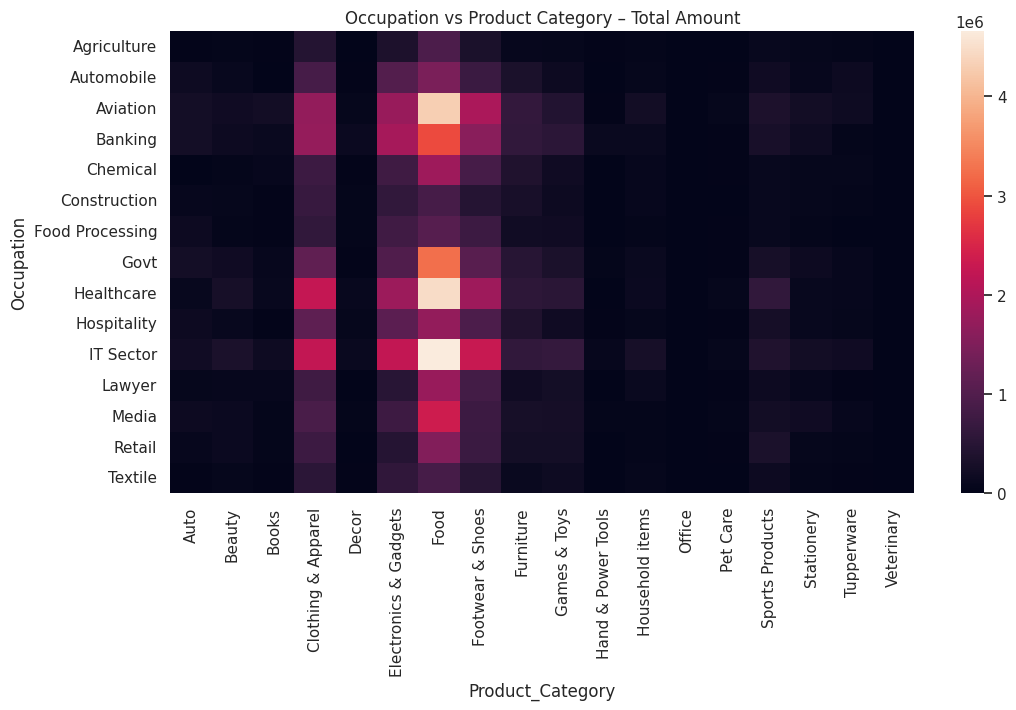

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_occ_cat, annot=False)
plt.title("Occupation vs Product Category – Total Amount")
plt.show()


Q5. What is the correlation between age and spending amount, and does this differ by gender?

In [ ]:
# Overall correlation
df[['Age', 'Amount']].corr()


,Age,Amount
Age,1.000000,0.030941
Amount,0.030941,1.000000


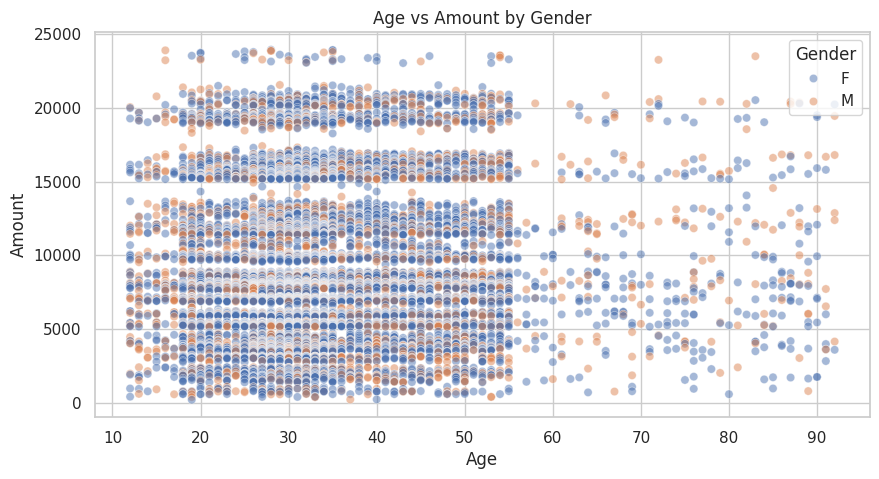

In [ ]:
sns.scatterplot(data=df, x='Age', y='Amount', hue='Gender', alpha=0.5)
plt.title("Age vs Amount by Gender")
plt.show()


In [ ]:
df[df['Gender'] == 'Male'][['Age', 'Amount']].corr()
df[df['Gender'] == 'Female'][['Age', 'Amount']].corr()


,Age,Amount
Age,NaN,NaN
Amount,NaN,NaN


In [ ]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1', 'Order_Date', 'Month_Year'],
      dtype='object')